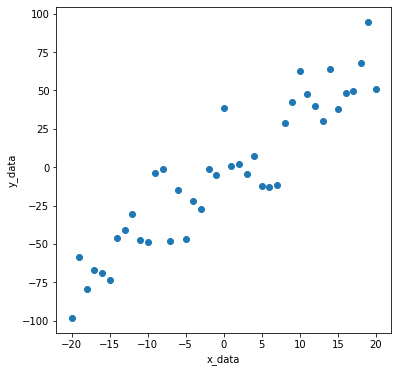

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_data = list(range(-20,21))
np.random.seed(2020)

mu = 0
sigma = 20
n = len(x_data)

noises = np.random.normal(mu, sigma, n)

W_answer = 3
b_answer = -3

y_temp = list(np.array(x_data)*W_answer + b_answer)
y_data = list(np.array(y_temp) + np.array(noises))

plt.figure(figsize=(6,6))
plt.scatter(x_data, y_data)
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.show()

[0] 	 W:0.6563372611999512 	 b:-0.5067985653877258 	 Cost:2717.190185546875


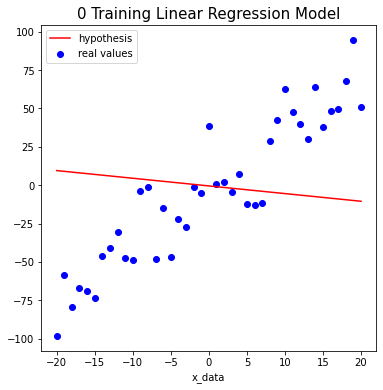



[200] 	 W:3.6297755241394043 	 b:-1.6261451244354248 	 Cost:323.11627197265625


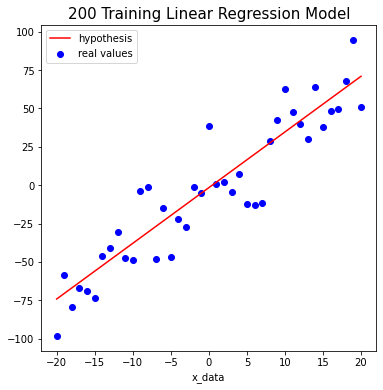



[400] 	 W:3.6297755241394043 	 b:-2.3761649131774902 	 Cost:320.25762939453125


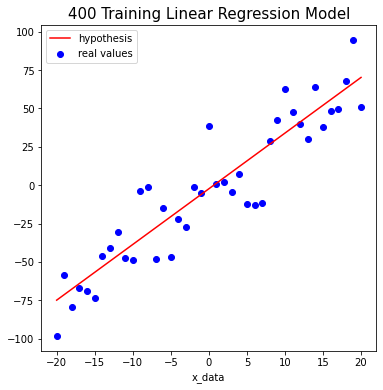



[600] 	 W:3.6297755241394043 	 b:-2.8787198066711426 	 Cost:318.97412109375


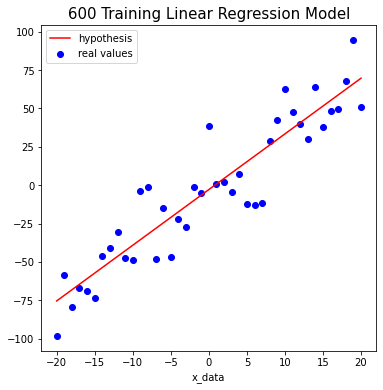



[800] 	 W:3.6297755241394043 	 b:-3.2154572010040283 	 Cost:318.39794921875


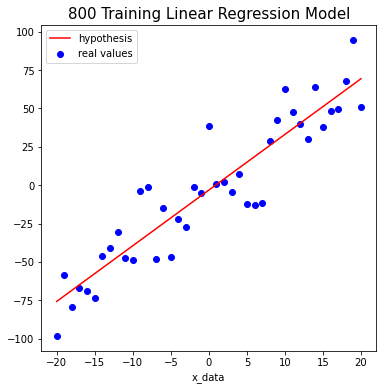



[1000] 	 W:3.6297755241394043 	 b:-3.4410855770111084 	 Cost:318.13922119140625


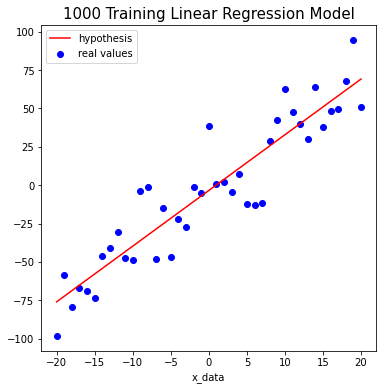

In [2]:
W = tf.Variable(-0.5)
b = tf.Variable(-0.5)

learning_rate = 0.001

cost_list=[]

for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b # y = wx + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data)) # cost is MSE

    W_grad, b_grad = tape.gradient(cost, [W, b]) # w로 미분 = w_grad, b로 미분 b_grad
    W.assign_sub(learning_rate * W_grad) #w = w - a*w_grad
    b.assign_sub(learning_rate * b_grad) #b = b - a*b_grad
    cost_list.append(cost.numpy())

    if i % 200 == 0:

        print('[{}] \t W:{} \t b:{} \t Cost:{}'.format(i, W.numpy(), b.numpy(), cost.numpy()))

        plt.figure(figsize=(6,6))
        plt.title('{} Training Linear Regression Model'.format(i), size=15)
        plt.scatter(x_data, y_data, color='blue', label='real values')
        plt.plot(x_data, hypothesis, color='red', label='hypothesis')
        plt.xlabel('x_data')
        plt.legend(loc='upper left')
        plt.show()

        print('\n')